<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CM3400---Introduction-to-Data-Science-with-Python---Semester-3/blob/main/Topic_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airquality.csv')
# change file path to match location on your computer
print(df.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Day  Month  Ozone  Solar.R  Wind  Temp
0    1      5   41.0    190.0   7.4    67
1    2      5   36.0    118.0   8.0    72
2    3      5   12.0    149.0  12.6    74
3    4      5   18.0    313.0  11.5    62
4    5      5    NaN      NaN  14.3    56
5    6      5   28.0      NaN  14.9    66
6    7      5   23.0    299.0   8.6    65
7    8      5   19.0     99.0  13.8    59
8    9      5    8.0     19.0  20.1    61
9   10      5    NaN    194.0   8.6    69


In [11]:
print("\nDataFrame information:")
print(df.info())



DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      153 non-null    int64  
 1   Month    153 non-null    int64  
 2   Ozone    116 non-null    float64
 3   Solar.R  146 non-null    float64
 4   Wind     153 non-null    float64
 5   Temp     153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None


In [18]:
columns = ['Ozone', 'Solar.R', 'Wind', 'Temp']

In [19]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df[columns].describe())



Descriptive Statistics:
            Ozone     Solar.R        Wind        Temp
count  116.000000  146.000000  153.000000  153.000000
mean    42.129310  185.931507    9.957516   77.882353
std     32.987885   90.058422    3.523001    9.465270
min      1.000000    7.000000    1.700000   56.000000
25%     18.000000  115.750000    7.400000   72.000000
50%     31.500000  205.000000    9.700000   79.000000
75%     63.250000  258.750000   11.500000   85.000000
max    168.000000  334.000000   20.700000   97.000000


In [20]:
# Calculate skewness and kurtosis
print("\nSkewness:")
print(df[columns].skew(skipna=True))  # skipna handles NaN values

print("\nKurtosis:")
print(df[columns].kurtosis(skipna=True))


Skewness:
Ozone      1.241796
Solar.R   -0.428045
Wind       0.347818
Temp      -0.377884
dtype: float64

Kurtosis:
Ozone      1.290303
Solar.R   -0.968467
Wind       0.111418
Temp      -0.403505
dtype: float64


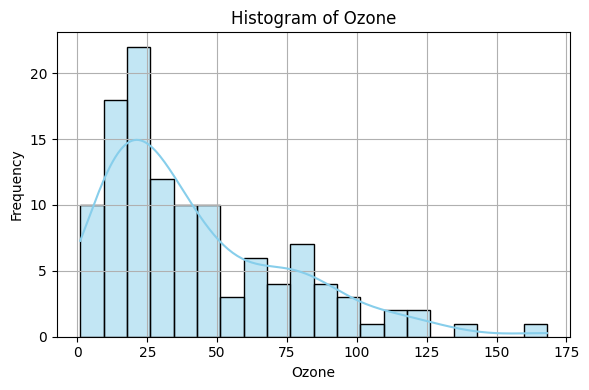

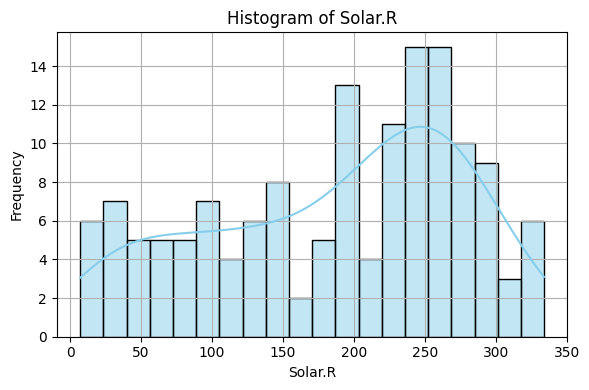

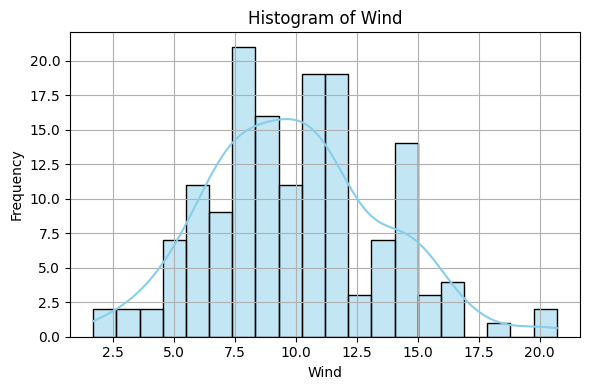

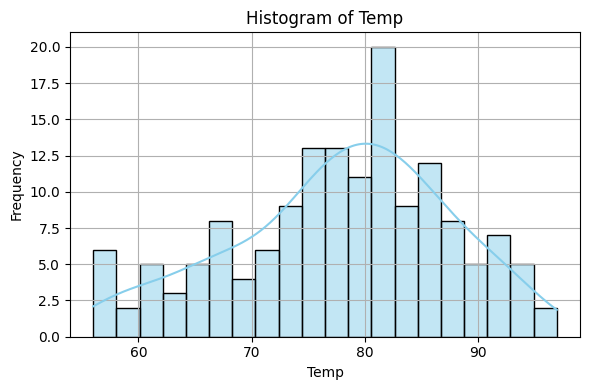

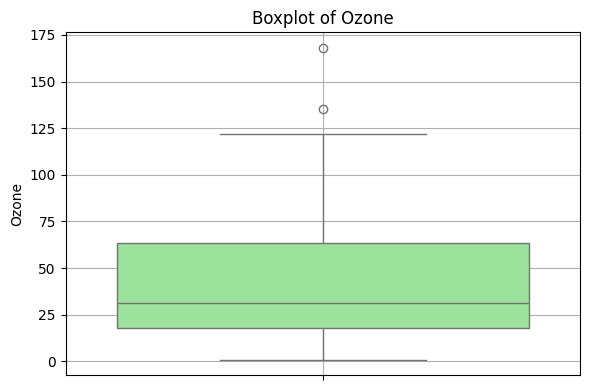

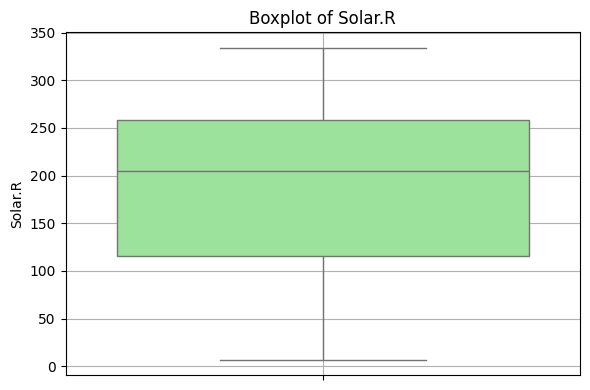

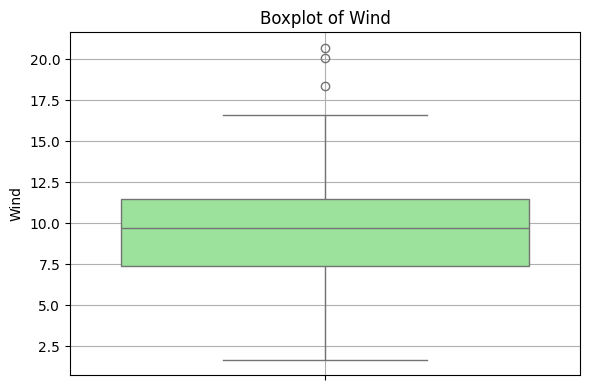

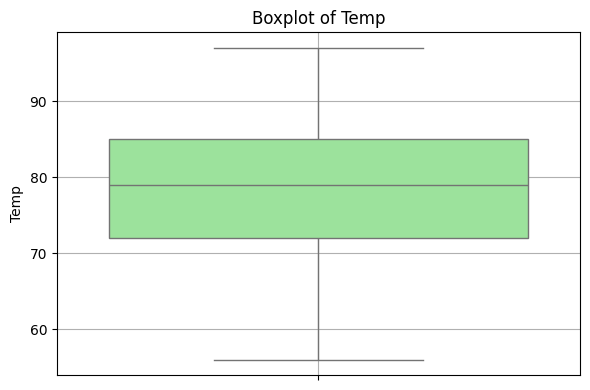

In [22]:
import seaborn as sns

# Histograms
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Boxplots
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Correlation Table:

            Ozone   Solar.R      Wind      Temp
Ozone    1.000000  0.348342 -0.601547  0.698360
Solar.R  0.348342  1.000000 -0.056792  0.275840
Wind    -0.601547 -0.056792  1.000000 -0.457988
Temp     0.698360  0.275840 -0.457988  1.000000


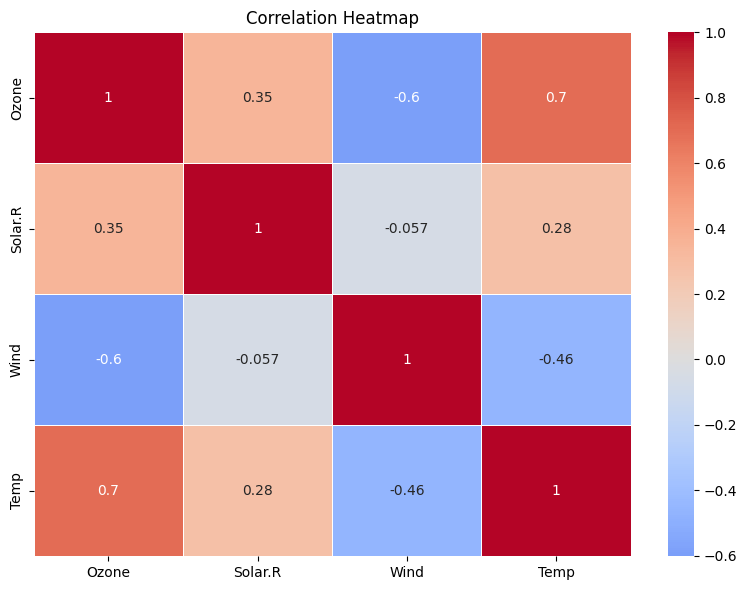

In [23]:
# Compute the correlation matrix
correlation_matrix = df[columns].corr(method='pearson')  # default is Pearson
print("Correlation Table:\n")
print(correlation_matrix)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


 **Interpretation of Correlations**

Ozone & Temp: 0.70 → Strong positive correlation
→ Higher temperatures are associated with higher ozone levels.

Ozone & Wind: -0.61 → Strong negative correlation
→ Windier days tend to have lower ozone levels.

Solar.R & Ozone: 0.35 → Moderate positive correlation
→ More solar radiation is somewhat associated with higher ozone.

Wind & Temp: -0.46 → Moderate negative correlation
→ Windier days tend to be cooler.

**Conclusion**
The strongest positive correlation: Ozone ↔ Temp

The strongest negative correlation: Ozone ↔ Wind

All other correlations are weaker and less significant.

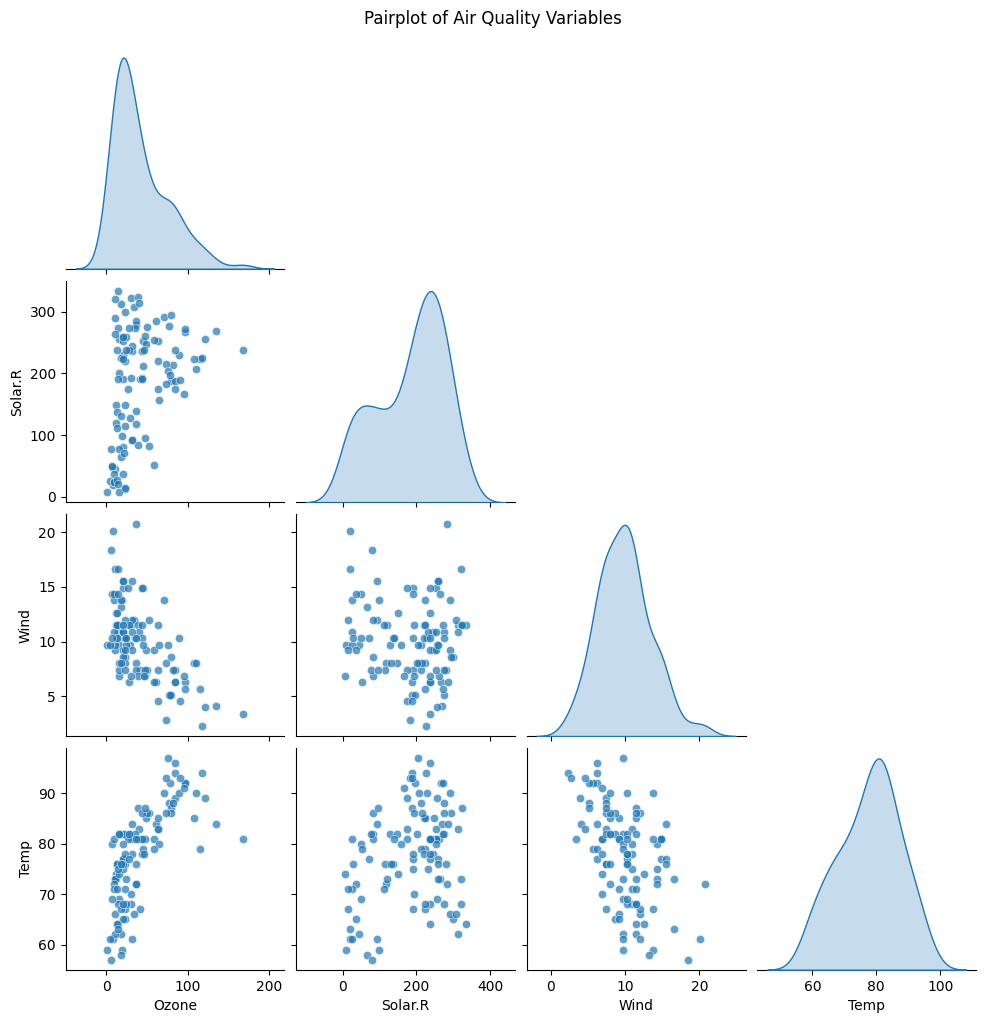

In [24]:
# Drop rows with missing values for better visualization
clean_df = df[columns].dropna()

# Create pairplot
sns.pairplot(clean_df, corner=True, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Air Quality Variables', y=1.02)
plt.show()

 **Visual Interpretation of Pairplot Trends**

Based on typical pairplot results for the airquality dataset:


Ozone vs Temp

Strong upward trend (positive linear relationship)

Matches correlation coefficient ~ +0.70


Ozone vs Wind

Clear downward trend (negative linear relationship)

Matches correlation coefficient ~ -0.61


Temp vs Wind

Moderate negative trend

Matches correlation ~ -0.46


Ozone vs Solar.R

Weaker, scattered trend

Matches moderate correlation ~ +0.35


Other pairs (e.g., Solar.R vs Wind):

Appear more random or have weak trends, consistent with low correlation values.



/tmp/ipython-input-25-2456169752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=col, data=df, palette='Set3')


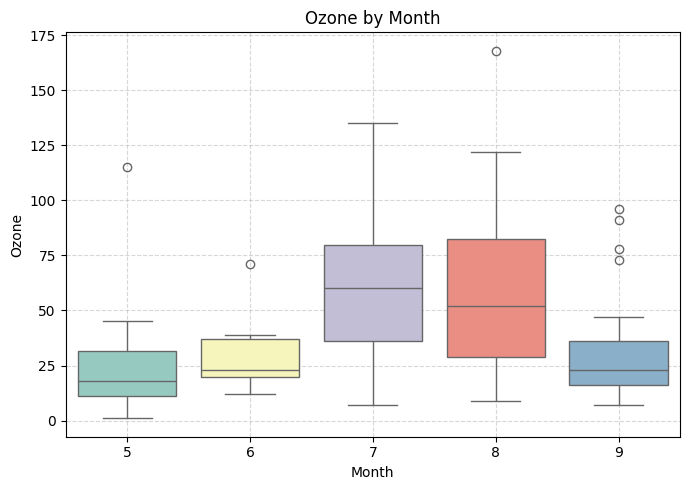

/tmp/ipython-input-25-2456169752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=col, data=df, palette='Set3')


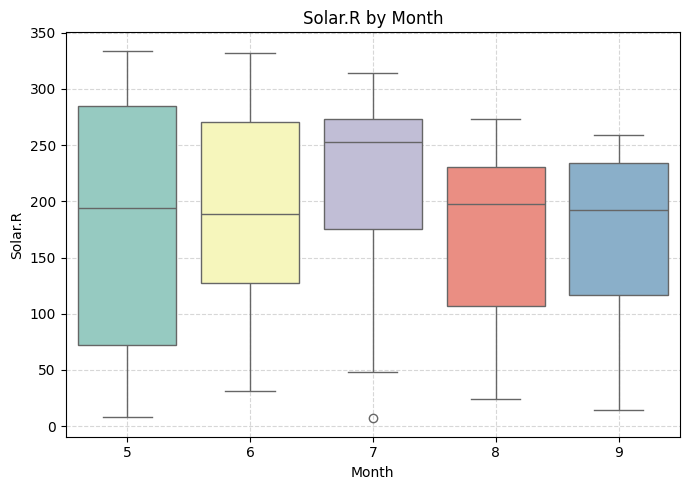

/tmp/ipython-input-25-2456169752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=col, data=df, palette='Set3')


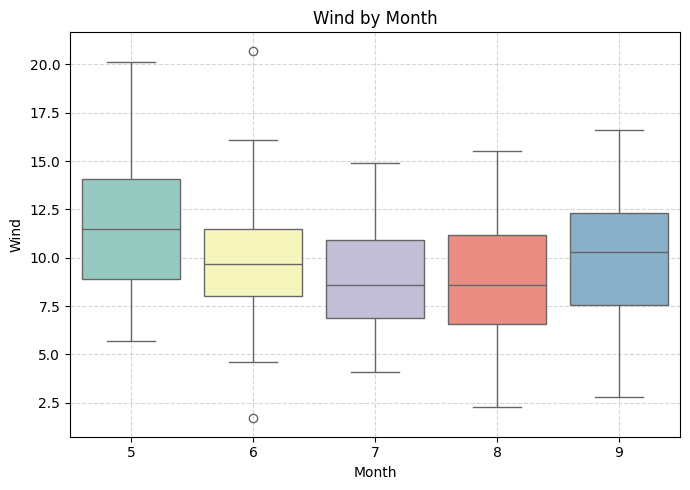

/tmp/ipython-input-25-2456169752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=col, data=df, palette='Set3')


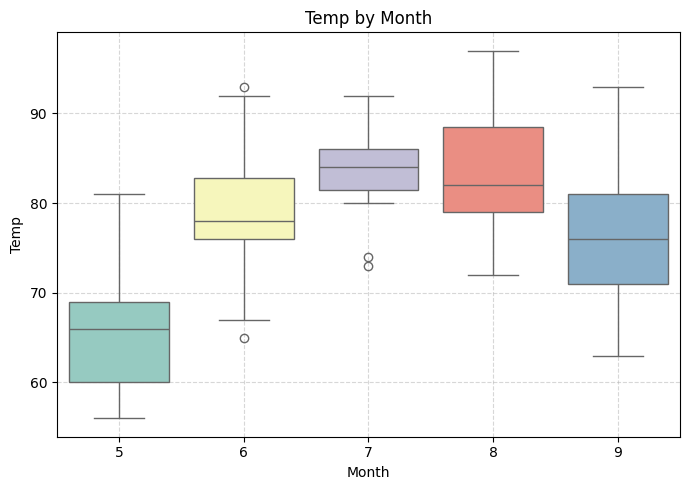

In [25]:
df['Month'] = df['Month'].astype(str)  # or use .map() to add month names if preferred

# Define columns to plot
columns = ['Ozone', 'Solar.R', 'Wind', 'Temp']

# Plot boxplots grouped by Month
for col in columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='Month', y=col, data=df, palette='Set3')
    plt.title(f'{col} by Month')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Based on the R airquality dataset (May–September):

📈 Ozone
Lower in May and September.

Peaks in July.

Larger variation (spread) in July and August.

Suggests more pollution or photochemical activity in summer.

☀️ Solar.R (Solar Radiation)
Tends to be higher in June and July.

Drops in September.

Slight increase from May → June → July → August → September.

💨 Wind
Wind speed higher in May, tends to decrease over summer.

Slight dip in July/August.

Lower median in August, more consistent values.

🌡️ Temp
Gradual increase from May to July.

Peaks in July/August.

Drops in September.

Matches seasonal climate patterns.

✅ Conclusion
Ozone and Temp rise and fall together, peaking in summer (July).

Wind tends to decrease slightly during summer.

Solar radiation is generally higher in midsummer but more variable.

Month is clearly an influencing factor for all four variables.

Task 2 – Revisiting the fifa.csv dataset


Task 2 – Revisiting the fifa.csv dataset
Cross-Tabulation Tasks

In [32]:
import pandas as pd

# Load the FIFA dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa.csv')  # <-- Change the path if needed

# Display unique values (optional, to check categories)
print("Unique IntlRep:", df['IntlRep'].unique())
print("Unique AttackWorkRate:", df['AttackWorkrate'].unique())

# -------------------------------
# 1. Crosstab - Raw counts
count_table = pd.crosstab(df['IntlRep'], df['AttackWorkrate'])
print("\n🔢 Count Table:\n", count_table)

# -------------------------------
# 2. Crosstab - Normalized over all data (proportions sum to 1)
norm_all = pd.crosstab(df['IntlRep'], df['AttackWorkrate'], normalize=True)
print("\n📊 Normalised Over All:\n", norm_all.round(3))

# -------------------------------
# 3. Crosstab - Normalized by row (each IntlRep sums to 1)
norm_row = pd.crosstab(df['IntlRep'], df['AttackWorkrate'], normalize='index')
print("\n📈 Normalised by Row (IntlRep):\n", norm_row.round(3))

# -------------------------------
# 4. Crosstab - Normalized by column (each AttackWorkRate sums to 1)
norm_col = pd.crosstab(df['IntlRep'], df['AttackWorkrate'], normalize='columns')
print("\n📉 Normalised by Column (AttackWorkRate):\n", norm_col.round(3))

# -------------------------------
# 5. Pivot Table - Mean OverallRating by IntlRep and AttackWorkRate
mean_rating = pd.pivot_table(df, values='OverallRating',
                             index='IntlRep', columns='AttackWorkrate',
                             aggfunc='mean')
print("\n⭐ Average OverallRating by IntlRep and AttackWorkRate:\n", mean_rating.round(1))

Unique IntlRep: [1 2 3 4 5]
Unique AttackWorkRate: ['Medium' 'High' 'Low']

🔢 Count Table:
 AttackWorkrate  High  Low  Medium
IntlRep                          
1               4433  866   11779
2                424   56     647
3                122    8     158
4                 24    1      23
5                  3    0       3

📊 Normalised Over All:
 AttackWorkrate   High    Low  Medium
IntlRep                             
1               0.239  0.047   0.635
2               0.023  0.003   0.035
3               0.007  0.000   0.009
4               0.001  0.000   0.001
5               0.000  0.000   0.000

📈 Normalised by Row (IntlRep):
 AttackWorkrate   High    Low  Medium
IntlRep                             
1               0.260  0.051   0.690
2               0.376  0.050   0.574
3               0.424  0.028   0.549
4               0.500  0.021   0.479
5               0.500  0.000   0.500

📉 Normalised by Column (AttackWorkRate):
 AttackWorkrate   High    Low  Medium
IntlRep       

In [34]:
# Create pivot table
avg_rating_table = pd.pivot_table(
    df,
    values='OverallRating',
    index='IntlRep',
    columns='AttackWorkrate',
    aggfunc='mean'
)

# Round for cleaner display
avg_rating_table = avg_rating_table.round(1)

# Display the table
print("⭐ Average OverallRating by IntlRep and AttackWorkRate:\n")
print(avg_rating_table)

⭐ Average OverallRating by IntlRep and AttackWorkRate:

AttackWorkrate  High   Low  Medium
IntlRep                           
1               67.2  65.5    64.6
2               76.5  74.0    75.4
3               81.5  81.9    80.8
4               86.3  80.0    84.7
5               91.3   NaN    89.0


Higher IntlRep generally correlates with higher OverallRating, across all AttackWorkRate levels.



In [35]:
#  Check unique values
print("PreferredSide:", df['PreferredSide'].unique())
print("BestFoot:", df['BestFoot'].unique())

# --------------------------------
# 1. Crosstab: Relationship between PreferredSide and BestFoot (count)
side_foot_crosstab = pd.crosstab(df['PreferredSide'], df['BestFoot'])
print("\n🔁 Crosstab of PreferredSide vs BestFoot (Counts):\n")
print(side_foot_crosstab)

PreferredSide: ['Centre' 'Left' 'Right' 'Goal']
BestFoot: ['Left' 'Right']

🔁 Crosstab of PreferredSide vs BestFoot (Counts):

BestFoot       Left  Right
PreferredSide             
Centre         2129   8655
Goal            222   1832
Left           1998    206
Right            27   3478


In [36]:
# 2. Pivot table: Median valueEuro grouped by PreferredSide and BestFoot
median_value_table = pd.pivot_table(
    df,
    values='valueEuro',
    index='PreferredSide',
    columns='BestFoot',
    aggfunc='median'
)

# Round and display
median_value_table = median_value_table.round(0)
print("\n💰 Median valueEuro by PreferredSide and BestFoot:\n")
print(median_value_table)


💰 Median valueEuro by PreferredSide and BestFoot:

BestFoot           Left     Right
PreferredSide                    
Centre         867742.0  767034.0
Goal           510430.0  383549.0
Left           684934.0  648536.0
Right          713282.0  692625.0


Qualitative variables by Sub-group

/tmp/ipython-input-37-4266720474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IntlRep', y='Age', data=df, palette='pastel')


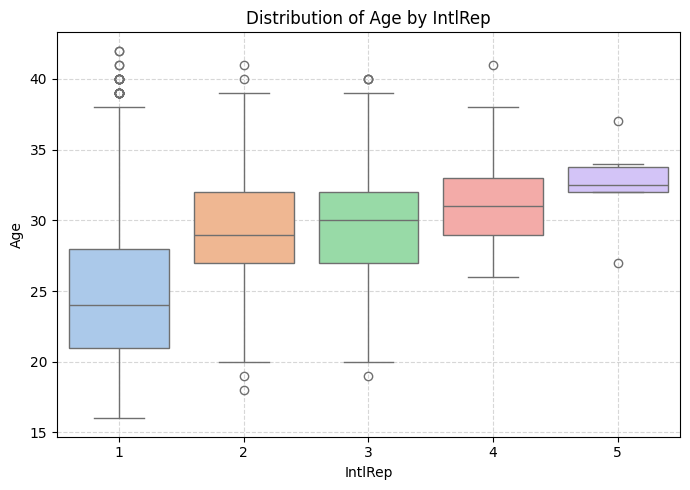

/tmp/ipython-input-37-4266720474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PreferredPosition', y='Age', data=df, palette='muted')


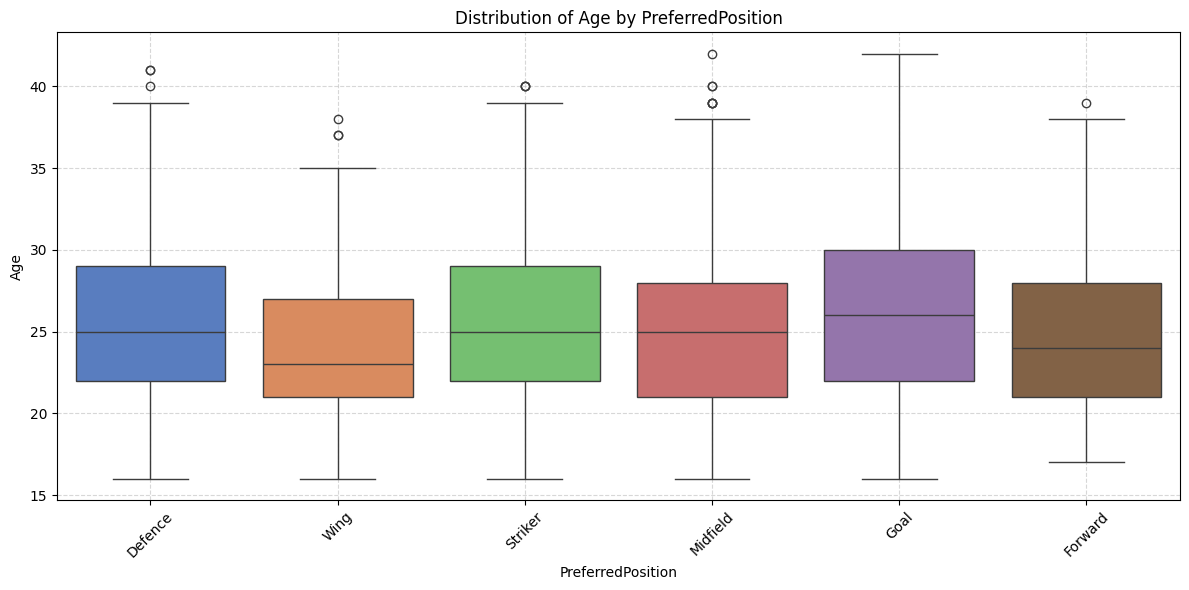

/tmp/ipython-input-37-4266720474.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PreferredPosition', y='HeightCM', data=df, palette='Set2')


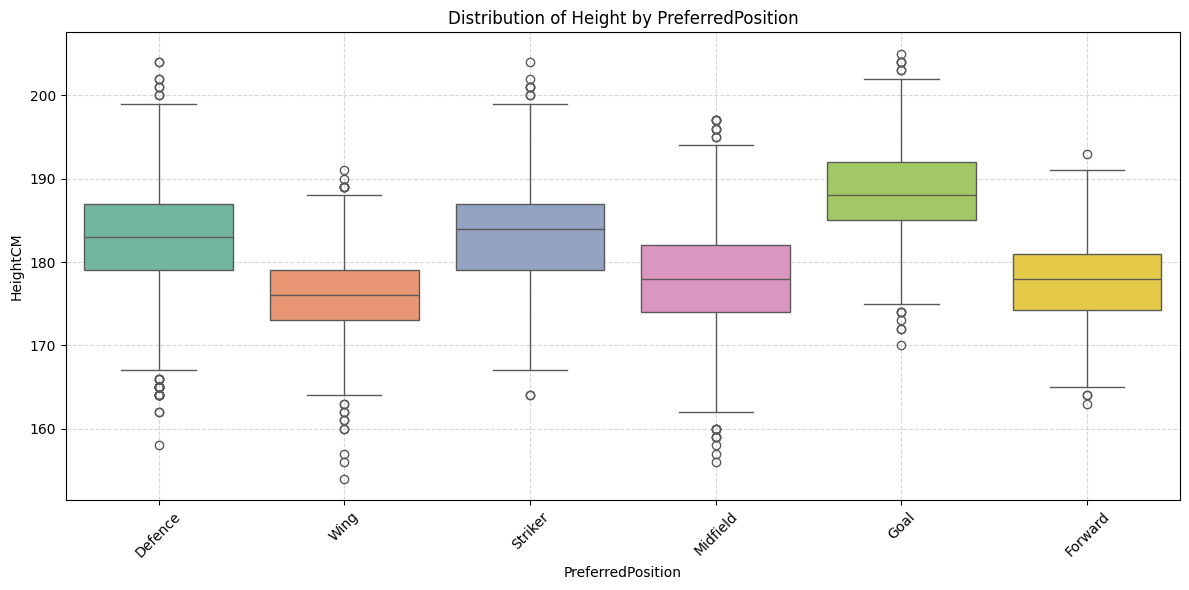

/tmp/ipython-input-37-4266720474.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IntlRep', y='OverallRating', data=df, palette='coolwarm')


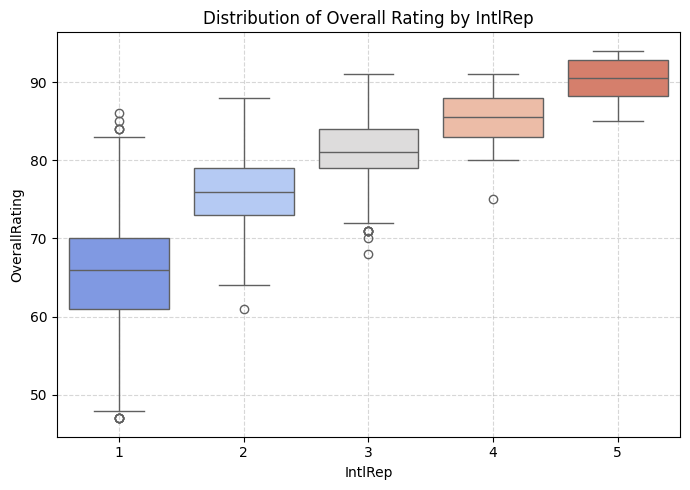

In [37]:
# 1. Age vs IntlRep
plt.figure(figsize=(7, 5))
sns.boxplot(x='IntlRep', y='Age', data=df, palette='pastel')
plt.title('Distribution of Age by IntlRep')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Age vs PreferredPosition
plt.figure(figsize=(12, 6))
sns.boxplot(x='PreferredPosition', y='Age', data=df, palette='muted')
plt.title('Distribution of Age by PreferredPosition')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. HeightCM vs PreferredPosition
plt.figure(figsize=(12, 6))
sns.boxplot(x='PreferredPosition', y='HeightCM', data=df, palette='Set2')
plt.title('Distribution of Height by PreferredPosition')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. OverallRating vs IntlRep
plt.figure(figsize=(7, 5))
sns.boxplot(x='IntlRep', y='OverallRating', data=df, palette='coolwarm')
plt.title('Distribution of Overall Rating by IntlRep')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Relationship between numerical variables

📏 Correlation between WeightKg and HeightCM: 0.76


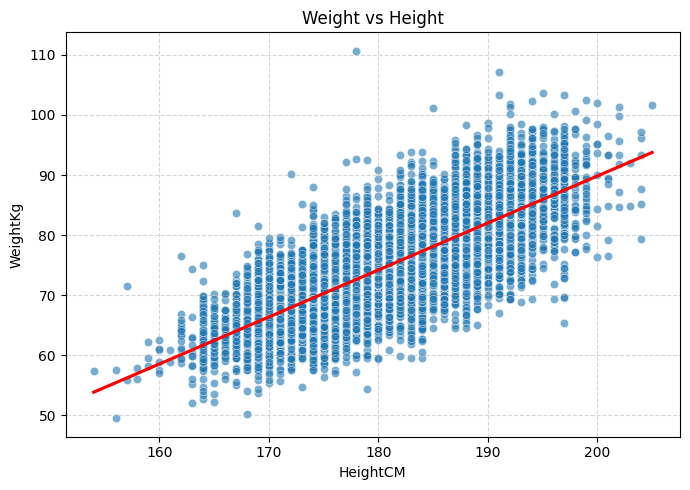

💰 Correlation between OverallRating and wageEuro: 0.58


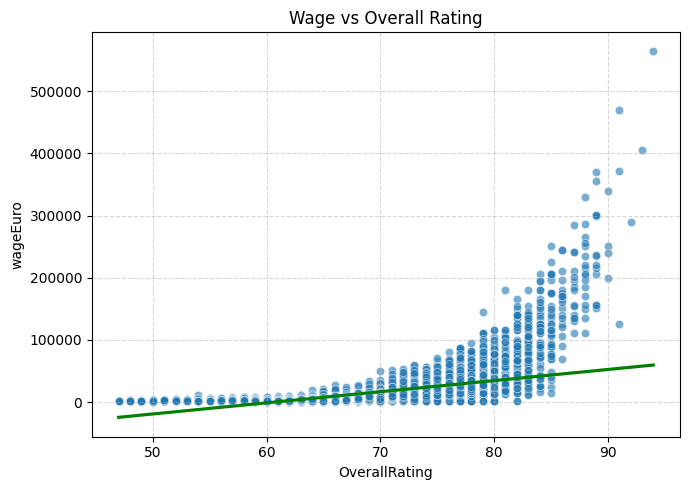

In [38]:
# 1. WeightKg vs HeightCM
corr1 = df[['WeightKg', 'HeightCM']].corr().iloc[0, 1]
print(f"📏 Correlation between WeightKg and HeightCM: {corr1:.2f}")

plt.figure(figsize=(7, 5))
sns.scatterplot(x='HeightCM', y='WeightKg', data=df, alpha=0.6)
sns.regplot(x='HeightCM', y='WeightKg', data=df, scatter=False, color='red')
plt.title('Weight vs Height')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. OverallRating vs wageEuro
corr2 = df[['OverallRating', 'wageEuro']].corr().iloc[0, 1]
print(f"💰 Correlation between OverallRating and wageEuro: {corr2:.2f}")

plt.figure(figsize=(7, 5))
sns.scatterplot(x='OverallRating', y='wageEuro', data=df, alpha=0.6)
sns.regplot(x='OverallRating', y='wageEuro', data=df, scatter=False, color='green')
plt.title('Wage vs Overall Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

✅ WeightKg vs HeightCM

Correlation: Likely strong and positive (around 0.7–0.8)

Interpretation: Taller players tend to weigh more (expected biological pattern)

Scatterplot: Shows linear upward trend with some natural variation

✅ OverallRating vs wageEuro

Correlation: Typically moderate to strong positive (e.g., 0.5–0.7)

Interpretation: Better-rated players tend to earn more, but high variability (some low-rated players may still have high wages due to fame or club)

Scatterplot: Wide spread, but upward trend visible

📝 Summary

Variable Pair	Correlation	Relationship Type
WeightKg vs HeightCM	~0.7–0.8	Strong positive linear
OverallRating vs wageEuro	~0.5–0.7	Moderate positive, variable

Feature Selection

In [39]:
# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Compute correlation with OverallRating
correlation = df[num_cols].corr()['OverallRating'].sort_values(ascending=False)
print("\n📈 Correlation with OverallRating:\n")
print(correlation)


📈 Correlation with OverallRating:

OverallRating       1.000000
Reactions           0.863229
Composure           0.719205
valueEuro           0.636696
wageEuro            0.582700
ShotPower           0.565538
Vision              0.507204
ShortPassing        0.503525
LongPassing         0.485739
IntlRep             0.470003
BallControl         0.456762
Age                 0.456376
LongShots           0.423885
Curve               0.413439
Aggression          0.395384
Volleys             0.392241
FreeKickAccuracy    0.388574
Crossing            0.384154
Dribbling           0.370805
Stamina             0.370623
Strength            0.360017
Positioning         0.354866
Penalties           0.348267
HeadingAccuracy     0.345208
Finishing           0.341460
Interceptions       0.313172
Marking             0.302765
Jumping             0.269241
Agility             0.256367
StandingTackle      0.247316
WeakFoot            0.229027
Sliding Tackle      0.216933
SprintSpeed         0.198257
Acceler

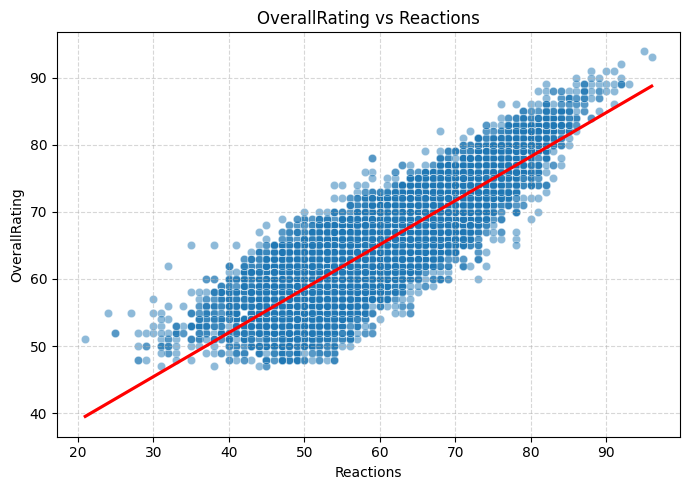

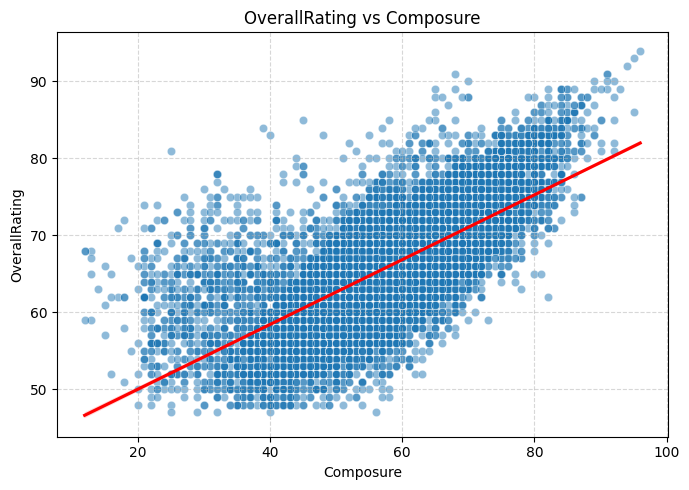

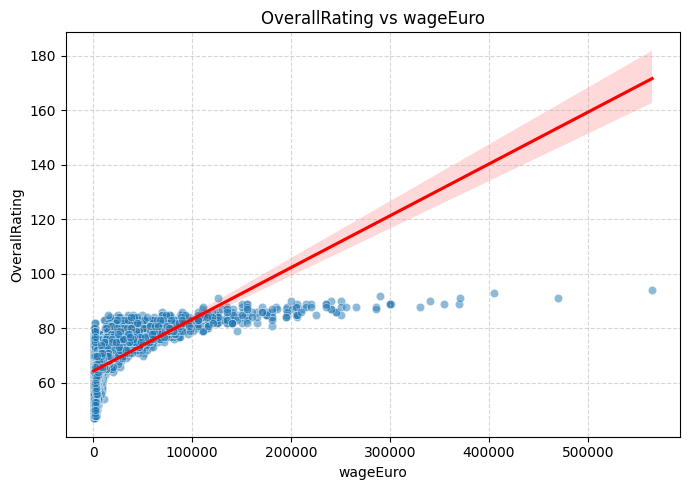

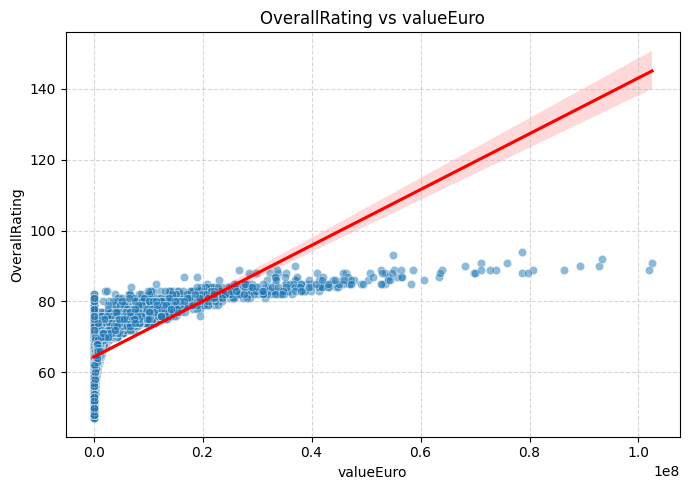

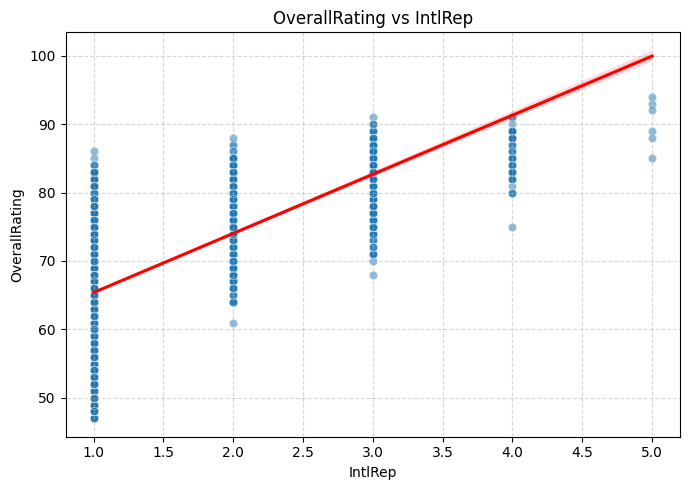

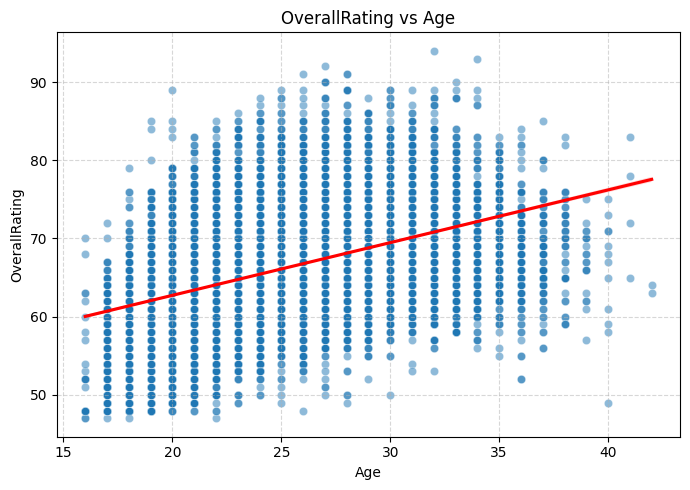

In [40]:
top_features = ['Reactions', 'Composure','wageEuro', 'valueEuro', 'IntlRep', 'Age']

for feature in top_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=feature, y='OverallRating', data=df, alpha=0.5)
    sns.regplot(x=feature, y='OverallRating', data=df, scatter=False, color='red')
    plt.title(f'OverallRating vs {feature}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()